In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS #used to generate world cloud

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
plt.style.use('ggplot')

### Loading Movies and Ratings Data

In [5]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

#### Sorting Movies & Ratings by movieId

In [6]:
#Sorting
movies.sort_values('movieId',inplace=True)
ratings.sort_values('movieId',inplace=True)
ratings.head()

,userId,movieId,rating,timestamp
2001185,13334,1,5.0,832023973
10627899,69000,1,4.0,1564248795
4075778,26803,1,3.5,1106468113
19245863,124893,1,3.5,1173048946
21816622,141835,1,3.5,1558539488


### Reseting the Index of Ratings & Movies  after sorting

In [7]:
movies.reset_index(inplace=True,drop=True)
ratings.reset_index(inplace=True,drop=True)
ratings.head()

,userId,movieId,rating,timestamp
0,13334,1,5.0,832023973
1,69000,1,4.0,1564248795
2,26803,1,3.5,1106468113
3,124893,1,3.5,1173048946
4,141835,1,3.5,1558539488


#### Spliting movie title and release year in seperate columns

In [8]:
movies['year']= movies.title.str.extract("\((\d{4})\)",expand =True)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


#### Converting year column to timestamp

In [9]:
movies['year'] = pd.to_datetime(movies['year'], format='%Y')

In [10]:
movies['year'] = movies['year'].dt.year

In [71]:
movies['year'] = pd.to_numeric(movies['year'])

In [72]:
movies.tail()

,movieId,title,genres,year
62418,209157,We,Drama,2018.0
62419,209159,Window of the Soul,Documentary,2001.0
62420,209163,Bad Poems,Comedy|Drama,2018.0
62421,209169,A Girl Thing,(no genres listed),2001.0
62422,209171,Women of Devil's Island,Action|Adventure|Drama,1962.0


#### Removing year from the movie title

In [12]:
movies['title'] = movies['title'].str[:-7]
movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji,Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men,Comedy|Romance,1995.0
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II,Comedy,1995.0


## List of Unique Genres

In [13]:
unique_genres = pd.DataFrame(movies['genres'].str.split('|').tolist()).stack().unique()

In [14]:
unique_genres = pd.DataFrame(unique_genres, columns=['genre'])
unique_genres

,genre
0,Adventure
1,Animation
2,Children
3,Comedy
4,Fantasy
5,Romance
6,Drama
7,Action
8,Crime
9,Thriller


### Frequency of each Genre

In [15]:
genres = {} #create an empty dictionary

for x in unique_genres['genre']: #loop on unique_genre
    for y in movies['genres']:   #loop on genre column of movies dataset
        z = y.split('|')         #split column into list
        if x in z:               #check if the unique_genre is present in the movies[genre]
            if x in genres:      #check if the genre already exists in the dictionary
                genres[x] +=1
            else:
                genres[x] = 1

In [16]:
genres

{'Adventure': 4145,
 'Animation': 2929,
 'Children': 2935,
 'Comedy': 16870,
 'Fantasy': 2731,
 'Romance': 7719,
 'Drama': 25606,
 'Action': 7348,
 'Crime': 5319,
 'Thriller': 8654,
 'Horror': 5989,
 'Mystery': 2925,
 'Sci-Fi': 3595,
 'IMAX': 195,
 'Documentary': 5605,
 'War': 1874,
 'Musical': 1054,
 'Western': 1399,
 'Film-Noir': 353,
 '(no genres listed)': 5062}

## WordCloud of Movie Genre

In [17]:
stopwords = set(STOPWORDS)

def mywordcloud(data, title=None):
    wordcloud = WordCloud(
    background_color = 'black',
    stopwords = stopwords,
    #max_words = 1000,
    relative_scaling = 0.5,
    #color_func= callable,
    normalize_plurals=False
    ).generate_from_frequencies(data)
    
    fig = plt.figure(1,figsize=(10,10))
    plt.axis('off')
    if title:
        fig.suptitle(title,fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show

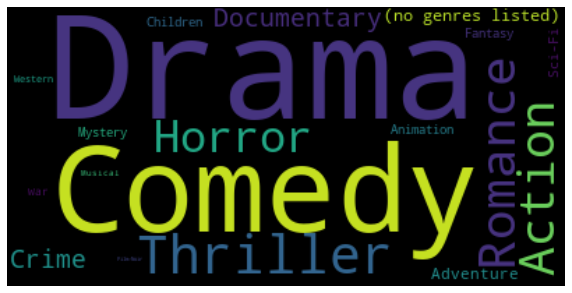

In [18]:
mywordcloud(genres)

Clearly Drama and Comedy are the favourite genres

#### Converting Genre Dictionary into DataFrame

In [19]:
moviegenre = pd.DataFrame(list(genres.items()),columns=['genre','counts'])

In [20]:
moviegenre =  moviegenre.sort_values('counts')

In [21]:
moviegenre.reset_index(inplace=True,drop=True)

In [22]:
moviegenre.head()

,genre,counts
0,IMAX,195
1,Film-Noir,353
2,Musical,1054
3,Western,1399
4,War,1874


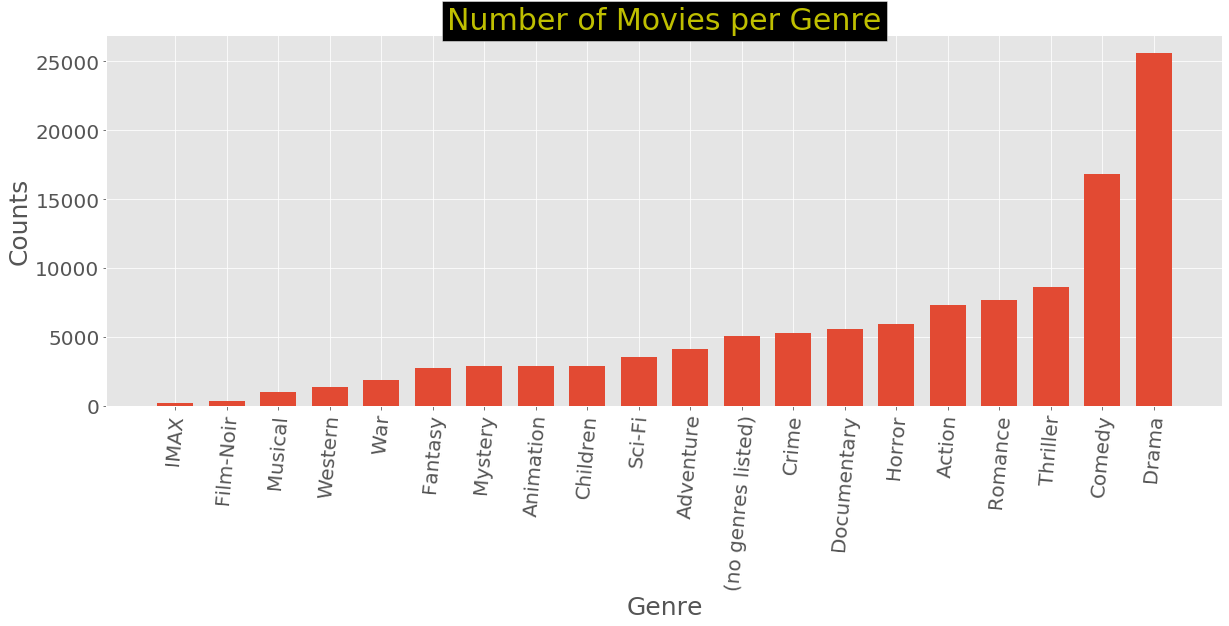

In [23]:
fig = plt.figure(1, figsize=(20,15))
ax1 = fig.add_subplot(2,1,2)

ax1.bar(moviegenre['genre'],moviegenre['counts'],0.7)

plt.xticks(rotation=85, fontsize = 20)
plt.yticks(fontsize = 20)

ax1.set_xlabel('Genre',fontsize=25)
ax1.set_ylabel('Counts',fontsize=25)

ax1.set_title('Number of Movies per Genre',bbox={'facecolor':'k','pad':5},color='y',fontsize=30)
plt.show()

#### Checking null values

In [24]:
moviesNan = movies[movies['year'].isna()]
moviesNan.head()

,movieId,title,genres,year
15036,79607,"Millions Game, The (Das Millione",Action|Drama|Sci-Fi|Thriller,NaN
25387,123619,Terrible Jo,(no genres listed),NaN
26284,125571,The Court-Martial of Jackie R,(no genres listed),NaN
26309,125632,In Our,(no genres listed),NaN
26392,125958,Stephen Fry In America - Ne,(no genres listed),NaN


#### There are some NaN values in year Columns

In [25]:
movies.count()

movieId    62423
title      62423
genres     62423
year       62013
dtype: int64

#### There are null values in year column. Let's drop null rows

In [26]:
movies = movies.dropna()

In [27]:
movies.count()

movieId    62013
title      62013
genres     62013
year       62013
dtype: int64

In [28]:
movies.isnull().any()

movieId    False
title      False
genres     False
year       False
dtype: bool

In [29]:
import datetime as dt

In [30]:
from datetime import datetime

#### Converting Timestamp to readable Date Format

In [31]:
ratings['timestamp'] = [datetime.fromtimestamp(x) for x in ratings['timestamp']]


In [32]:
ratings['timestamp'] = ratings['timestamp'].dt.year
ratings.head()

,userId,movieId,rating,timestamp
0,13334,1,5.0,1996
1,69000,1,4.0,2019
2,26803,1,3.5,2005
3,124893,1,3.5,2007
4,141835,1,3.5,2019


#### Let's calculate Number of Movies Per Year

As we cleaned the movies title column we can plot the movies according to the release data

In [33]:
movies_per_year = movies[['movieId','year']].groupby('year')
movies_per_year.head()

,movieId,year
0,1,1995.0
1,2,1995.0
2,3,1995.0
3,4,1995.0
4,5,1995.0
...,...,...
57039,195473,2019.0
57371,196223,2019.0
57462,196417,2019.0
59938,202045,1880.0


#### This is Total Number of Movies per Year

In [34]:
movies_genre_year = pd.DataFrame({'All_movies': movies_per_year.movieId.nunique()})
movies_genre_year.tail()

,All_movies
year,
2015.0,2513
2016.0,2488
2017.0,2374
2018.0,2034
2019.0,994


#### Let's Calculate Total Movies per Genre per Year 

In [35]:
for g in unique_genres['genre']:
    moviegenre = movies[movies['genres'].str.contains(g)][['movieId','year']].groupby('year')
    movies_genre_year[g] = moviegenre.movieId.nunique()

C:\Users\rhnye\Anaconda3\lib\site-packages\pandas\core\strings.py:1843: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



#### Filling NaN values with 0

In [36]:
movies_genre_year.fillna(0,inplace=True)

In [37]:
movies_genre_year.tail()

,All_movies,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
year,,,,,,,,,,,,,,,,,,,,,
2015.0,2513,137.0,102.0,121.0,626.0,91.0,236.0,926.0,243.0,138.0,...,285.0,103.0,160.0,1.0,359.0,38.0,2.0,14.0,0.0,225.0
2016.0,2488,121.0,100.0,105.0,622.0,86.0,232.0,891.0,257.0,138.0,...,261.0,109.0,132.0,0.0,354.0,33.0,0.0,15.0,0.0,201.0
2017.0,2374,113.0,113.0,88.0,594.0,85.0,195.0,864.0,261.0,143.0,...,275.0,106.0,151.0,0.0,331.0,40.0,0.0,15.0,0.0,166.0
2018.0,2034,95.0,86.0,76.0,503.0,92.0,145.0,737.0,237.0,127.0,...,239.0,85.0,135.0,0.0,288.0,31.0,0.0,16.0,0.0,98.0
2019.0,994,47.0,54.0,50.0,254.0,35.0,70.0,387.0,122.0,74.0,...,121.0,43.0,55.0,0.0,124.0,19.0,0.0,7.0,0.0,47.0


In [38]:
movies_genre_year.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 135 entries, 1874.0 to 2019.0
Data columns (total 21 columns):
All_movies            135 non-null int64
Adventure             135 non-null float64
Animation             135 non-null float64
Children              135 non-null float64
Comedy                135 non-null float64
Fantasy               135 non-null float64
Romance               135 non-null float64
Drama                 135 non-null float64
Action                135 non-null float64
Crime                 135 non-null float64
Thriller              135 non-null float64
Horror                135 non-null float64
Mystery               135 non-null float64
Sci-Fi                135 non-null float64
IMAX                  135 non-null float64
Documentary           135 non-null float64
War                   135 non-null float64
Musical               135 non-null float64
Western               135 non-null float64
Film-Noir             135 non-null float64
(no genres listed)    135 n

In [39]:
movies_genre_year.iplot(title='Movie Genre per Year',xTitle='Year',yTitle='No. of Movies')

In the above plot there are Total Number of Movies-Genre per year.
Plotly interactive plots are helpful to get insights of trend.
Eg. Increase in Movie Genre-Animation after 1995 is likely to do with the technology development. 

In [40]:
df = pd.DataFrame({'All_movies': movies_per_year.movieId.nunique().cumsum()})

<Figure size 1440x360 with 0 Axes>

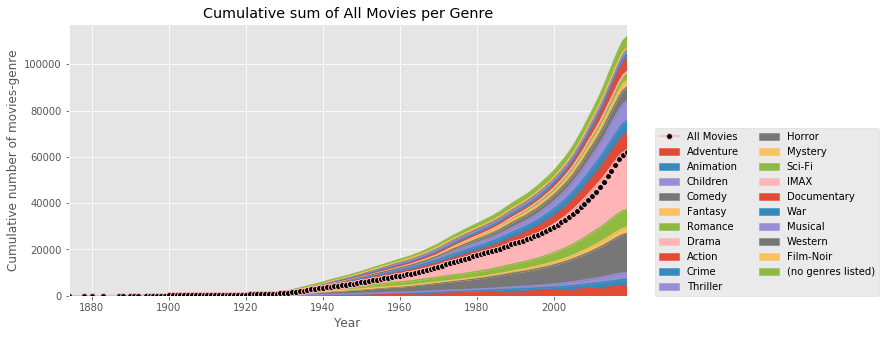

In [41]:
plt.figure(figsize=(20,5))

# Cumulative sum of Movies per Genre
for g in unique_genres['genre']:
    moviegenre = movies[movies['genres'].str.contains(g)][['movieId','year']].groupby('year')
    df[g] = moviegenre.movieId.nunique().cumsum()

df.fillna(method='ffill',inplace=True)
df.loc[:,df.columns != 'All_movies'].plot.area(stacked=True, figsize=(10,5)) #Plot Area except for All Movies Column

# Plot histogram for all movies
plt.plot(df['All_movies'], marker='o', markerfacecolor='black',label='All Movies')
plt.xlabel('Year')
plt.ylabel('Cumulative number of movies-genre')
plt.title('Cumulative sum of All Movies per Genre') # Many movies have multiple genres, so counthere is higher than number of movies
plt.legend(loc=(1.05,0), ncol=2)
plt.show()

In the above plot we can see that the Drama & Comedy are the top genres used. 
Most the movies are categorized to more than 2 genres.
Therefore the cumulative sum of the genres is double than the total number of movies.

In [42]:
df.tail()

,All_movies,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
year,,,,,,,,,,,,,,,,,,,,,
2015.0,54123,3760.0,2574.0,2611.0,14871.0,2426.0,7066.0,22680.0,6458.0,4832.0,...,5074.0,2578.0,3110.0,195.0,4464.0,1751.0,1053.0,1346.0,353.0,4286.0
2016.0,56611,3881.0,2674.0,2716.0,15493.0,2512.0,7298.0,23571.0,6715.0,4970.0,...,5335.0,2687.0,3242.0,195.0,4818.0,1784.0,1053.0,1361.0,353.0,4487.0
2017.0,58985,3994.0,2787.0,2804.0,16087.0,2597.0,7493.0,24435.0,6976.0,5113.0,...,5610.0,2793.0,3393.0,195.0,5149.0,1824.0,1053.0,1376.0,353.0,4653.0
2018.0,61019,4089.0,2873.0,2880.0,16590.0,2689.0,7638.0,25172.0,7213.0,5240.0,...,5849.0,2878.0,3528.0,195.0,5437.0,1855.0,1053.0,1392.0,353.0,4751.0
2019.0,62013,4136.0,2927.0,2930.0,16844.0,2724.0,7708.0,25559.0,7335.0,5314.0,...,5970.0,2921.0,3583.0,195.0,5561.0,1874.0,1053.0,1399.0,353.0,4798.0


In [43]:
ratings_per_year = ratings[['rating','timestamp']].groupby('timestamp')
ratings_per_year.head()

,rating,timestamp
0,5.0,1996
1,4.0,2019
2,3.5,2005
3,3.5,2007
4,3.5,2019
...,...,...
487,5.0,2012
761,4.0,2014
281651,3.0,1995
525838,5.0,1995


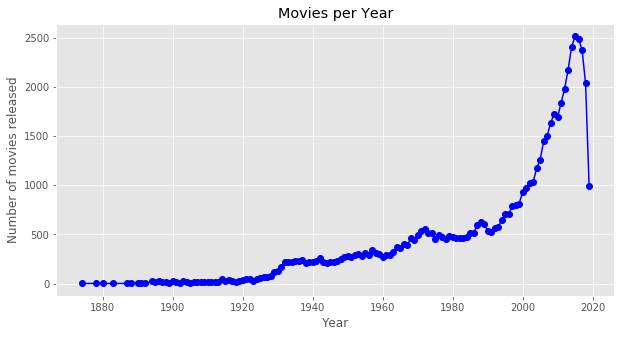

In [44]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(movies_per_year['year'].first(),movies_per_year['movieId'].nunique(),"b-o")

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of movies released')

plt.title('Movies per Year')

plt.show()

In the above plot we can see that Number of movies released per year were increasing almost exponentially until 2009, then flattening and dropping signifincantly in 2014 (2015 data is incomplete).

#### Total Number of Ratings per Year

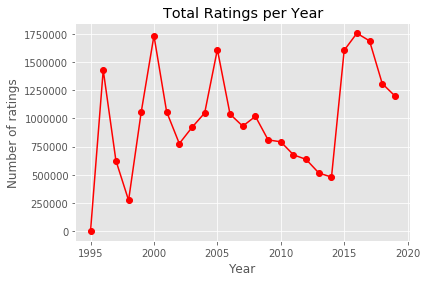

In [45]:
fig, ax = plt.subplots()

ax.plot(ratings_per_year['timestamp'].first(), ratings_per_year['rating'].count(),"r-o",label='Ratings per Year')

ax.set_xlabel('Year')
ax.set_ylabel('Number of ratings')

plt.title('Total Ratings per Year')

plt.show()


In the above plot we can see that there are no ratings before 1995, this is likely due to the availability of Internet.

#### Merged Data Set of Movies & Ratings

In [46]:
movieRatings = pd.read_csv('movieRating2.csv')
movieRatings.head()

,Unnamed: 0,userId,movieId,rating,timestamp,movieId.1,title,genres
0,0,13334,1,5.0,1996,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,69000,1,4.0,2019,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,2,26803,1,3.5,2005,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,3,124893,1,3.5,2007,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,4,141835,1,3.5,2019,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [47]:
movieRatings.columns

Index(['Unnamed: 0', 'userId', 'movieId', 'rating', 'timestamp', 'movieId.1',
       'title', 'genres'],
      dtype='object')

#### Dropping Columns

In [48]:
movieRatings.drop(['Unnamed: 0','movieId.1'],axis=1,inplace=True)

#### Mean Rating of each Movie

In [49]:
movieRatings.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
From Here To Eternity: The Musical (2014)    5.0
Tainted Blood (1993)                         5.0
Look at Me (2012)                            5.0
My Christmas Prince (2017)                   5.0
You Must Be Joking (2014)                    5.0
Name: rating, dtype: float64

#### Total Number of Ratings for each Movie

In [50]:
movieRatings.groupby('title')['rating'].count().sort_values(ascending=False).tail()

title
On Reflection: B.S. Johnson on Dr. Samuel Johnson (1972)    1
On Top (1982)                                               1
Checkmate                                                   1
On Trial (1954)                                             1
"BLOW THE NIGHT!" Let's Spend the Night Together (1983)     1
Name: rating, dtype: int64

## Aggregate Functions

#### Let's get the Statistics of each Movie
Minimum Rating, Maximum Rating, Total No. of Ratings, Average Rating

In [51]:
movieRatingStats = pd.DataFrame(movieRatings.groupby('title')['rating'].mean())

In [52]:
movieRatingStats['min'] = movieRatings.groupby('title')['rating'].min()

In [53]:
movieRatingStats['max'] = movieRatings.groupby('title')['rating'].max()

In [54]:
movieRatingStats['count'] = movieRatings.groupby('title')['rating'].count()

In [55]:
movieRatingStats['std'] = movieRatings.groupby('title')['rating'].std()

In [56]:
movieRatingStats['genre'] = movieRatings.groupby('title')['genres'].first()

#### Resetting Index from 'title' to default

In [57]:
movieRatingStats.reset_index(inplace=True)

In [58]:
movieRatingStats.head()

,title,rating,min,max,count,std,genre
0,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",3.000000,3.0,3.0,1,NaN,Documentary|Drama
1,"""Great Performances"" Cats (1998)",2.896648,0.5,5.0,179,1.481796,Musical
2,#1 Cheerleader Camp (2010),2.111111,0.5,4.0,9,1.293681,Comedy|Drama
3,#Captured (2017),3.750000,2.5,5.0,2,1.767767,Horror
4,#Female Pleasure (2018),3.666667,3.5,4.0,3,0.288675,Documentary


#### Extracting Year From Title

In [59]:
movieRatingStats['year'] = movieRatingStats['title'].str.extract("\((\d{4})\)",expand =True)

In [60]:
movieRatingStats['year'] = pd.to_datetime(movieRatingStats['year'], format='%Y')

In [61]:
movieRatingStats['year'] = movieRatingStats['year'].dt.year

In [62]:
movieRatingStats.isna().any()

title     False
rating    False
min       False
max       False
count     False
std        True
genre     False
year       True
dtype: bool

In [63]:
movieRatingStats.dropna(inplace=True)

In [64]:
movieRatingStats.isna().any()

title     False
rating    False
min       False
max       False
count     False
std       False
genre     False
year      False
dtype: bool

In [65]:
movieRatingStats.columns

Index(['title', 'rating', 'min', 'max', 'count', 'std', 'genre', 'year'], dtype='object')

In [66]:
movieRatingStats['rating'].iplot(kind='box',bins=25,title='All Movies Rating Boxplot',yTitle='Density',xTitle='Movie Rating')

In [67]:
dftmp = ratings[['movieId','rating']].groupby('movieId').mean()

In [68]:
dftmp.head()

,rating
movieId,
1,3.893708
2,3.251527
3,3.142028
4,2.853547
5,3.058434


In [69]:
rating_stats = []

C:\Users\rhnye\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:412: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.

C:\Users\rhnye\Anaconda3\lib\site-packages\pandas\core\strings.py:1843: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



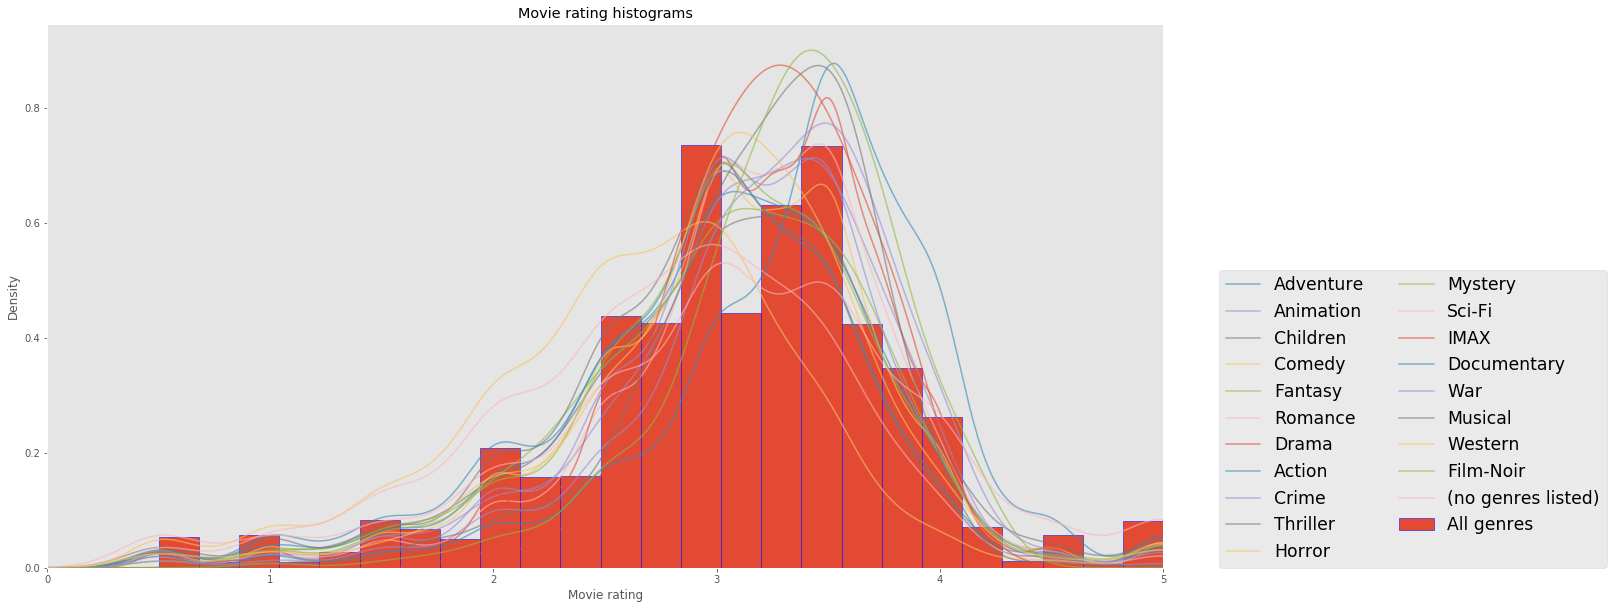

In [70]:
# Plot general histogram of all ratings
dftmp.hist(bins=25, grid=False, edgecolor='b', normed=True, label ='All genres', figsize=(20,10))

for g in unique_genres.genre:
    dftmp = movies[movies['genres'].str.contains(g)]
    dftmp = ratings[ratings.set_index('movieId').index.isin(dftmp.set_index('movieId').index)]
    dftmp = dftmp[['movieId','rating']].groupby('movieId').mean()
    dftmp.rating.plot(grid=False, alpha=0.6, kind='kde', label=g)
    avg = dftmp.rating.mean()
    std = dftmp.rating.std()
    rating_stats.append((g, avg, std))

plt.legend(loc=(1.05,0), ncol=2, fontsize='xx-large')
plt.xlim(0,5)
plt.xlabel('Movie rating')
plt.title('Movie rating histograms')
plt.show()    


All genres show a similar pattern (right-skewed log-normal distribution??), except perhaps Horror movies which are a bit skewed to the left (poorer ratings)
People don't like being scared, no matter how good the movie is from a technical point of view.
Movies without a tagged genre (no-genres listed) are also outliers, but likely due to the low number of ocurrences.